In [255]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [256]:
features = pd.read_csv('ch6_cell28_dev_feat1_filtered.tsv.gz',header=0, sep='\t')

In [257]:
print('The shape of our features is:', features.shape)

The shape of our features is: (44959, 381)


In [258]:
# Descriptive statistics for each column
features.describe()

,rel#count,http://dbpedia.org/ontology/area#1,http://dbpedia.org/ontology/areaCode#count,http://dbpedia.org/ontology/areaLand#count,http://dbpedia.org/ontology/areaLand#1,http://dbpedia.org/ontology/areaLand#2,http://dbpedia.org/ontology/areaTotal#count,http://dbpedia.org/ontology/areaTotal#1,http://dbpedia.org/ontology/areaWater#count,http://dbpedia.org/ontology/areaWater#1,...,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_Hamburg>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_people_from_Bolton>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_educational_institutions>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_local_government>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Hainan>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@OTHER,http://xmlns.com/foaf/0.1/homepage#count,http://xmlns.com/foaf/0.1/name#count,http://xmlns.com/foaf/0.1/nick#count,population
count,44959.000000,4.495900e+04,44959.000000,44959.000000,4.495900e+04,4.495900e+04,44959.000000,4.495900e+04,44959.000000,4.495900e+04,...,44959.000000,44959.000000,44959.000000,44959.000000,44959.000000,44959.000000,44959.000000,44959.000000,44959.000000,44959.000000
mean,1.230090,2.982757e+06,0.176769,0.105840,1.378233e+07,5.021959e+06,0.211165,8.683438e+08,0.088642,1.468352e+06,...,0.000044,0.000044,0.000044,0.000044,0.000044,0.965969,0.130238,0.308482,0.019220,3.889512
std,0.313163,1.051562e+08,0.169584,0.188006,2.167174e+08,5.114839e+07,0.184244,5.559255e+10,0.165233,6.645362e+07,...,0.006670,0.006670,0.006670,0.006670,0.006670,0.181311,0.149760,0.115732,0.077467,0.683325
min,0.301030,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,1.041393,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.301030,0.000000,3.347623
50%,1.146128,0.000000e+00,0.301030,0.000000,0.000000e+00,0.000000e+00,0.301030,5.610000e+06,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.301030,0.000000,3.735519
75%,1.380211,0.000000e+00,0.301030,0.000000,0.000000e+00,0.000000e+00,0.301030,3.540000e+07,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.301030,0.301030,0.000000,4.288249
max,4.203876,1.836000e+10,0.954243,0.477121,2.511370e+10,7.033631e+09,0.477121,1.072746e+13,0.477121,9.830521e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.698970,0.778151,1.041393,7.385606


In [259]:
#data preperation
labels = features['population']
features = features.drop('name', axis=1)
feature_list = list(features.columns)
features = features.iloc[:,0:-1]

In [260]:
#train test split
train_features, test_features, train_labels, test_labels = train_test_split(features,labels,test_size=0.3, random_state=42)


In [261]:
#train the model 
#instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators= 100, random_state=42)
rf.fit(train_features,train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [263]:
# #Visualize the tree 
# from sklearn.tree import export_graphviz
# from sklearn.tree import export_graphviz

# #Limit depth of tree to 3 levels
# rf_small = RandomForestRegressor(n_estimators=100, max_depth = 3)
# rf_small.fit(train_features, train_labels)
# # Extract the small tree
# tree_small = rf_small.estimators_[5]
# # Save the tree as a png image
# export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# (graph, ) = pydot.graph_from_dot_file('small_tree.dot')
# graph.write_png('small_tree.png')

In [264]:
#Make prediction on the test set 
predictions = rf.predict(test_features)
errors = abs(predictions- test_labels)
print('Mean Absolute Error:', np.mean(errors))

Mean Absolute Error: 0.21634989008154504


In [265]:
#Determine Performance Metrics 
#Caculate MAPE(Mean abosolute percentage error)
mape = 100*(errors/test_labels)
#Calculate accuracy
accuracy = 100-np.mean(mape)
print("Accuracy:", accuracy,"%")

Accuracy: 94.45536952949631 %


In [266]:
#Variable Importances
importances  = list(rf.feature_importances_)

feature_importances = [(feature,importance) for feature,importance in zip(feature_list,importances)]
feature_importances = sorted(feature_importances, key=lambda x:x[1], reverse=True)

[print("Variable: {:20} Importance: {}".format(*pair))for pair in feature_importances]

Variable: http://dbpedia.org/ontology/birthPlace?inv#count Importance: 0.23796996573399987
Variable: http://dbpedia.org/ontology/areaTotal#1 Importance: 0.11670458385875429
Variable: http://dbpedia.org/ontology/country#1@OTHER Importance: 0.10121098690987221
Variable: http://dbpedia.org/ontology/country#1@<http://dbpedia.org/resource/India> Importance: 0.0640373507153476
Variable: http://dbpedia.org/ontology/timeZone#1@<http://dbpedia.org/resource/China_Standard_Time> Importance: 0.045149773040545745
Variable: rel#count            Importance: 0.04195969545598847
Variable: http://dbpedia.org/ontology/populationDensity#1 Importance: 0.03812664227061522
Variable: http://dbpedia.org/ontology/elevation#1 Importance: 0.03336793596900702
Variable: http://www.w3.org/1999/02/22-rdf-syntax-ns#type#1@<http://dbpedia.org/ontology/City> Importance: 0.018525076748226555
Variable: http://dbpedia.org/ontology/country#1@<http://dbpedia.org/resource/Brazil> Importance: 0.017113339585520197
Variable: htt

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

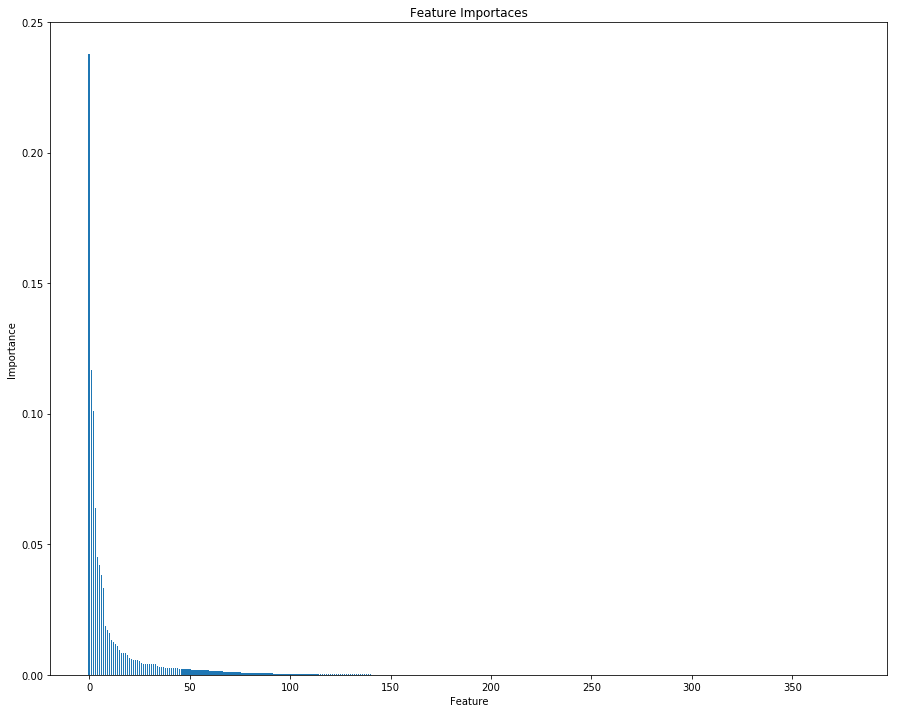

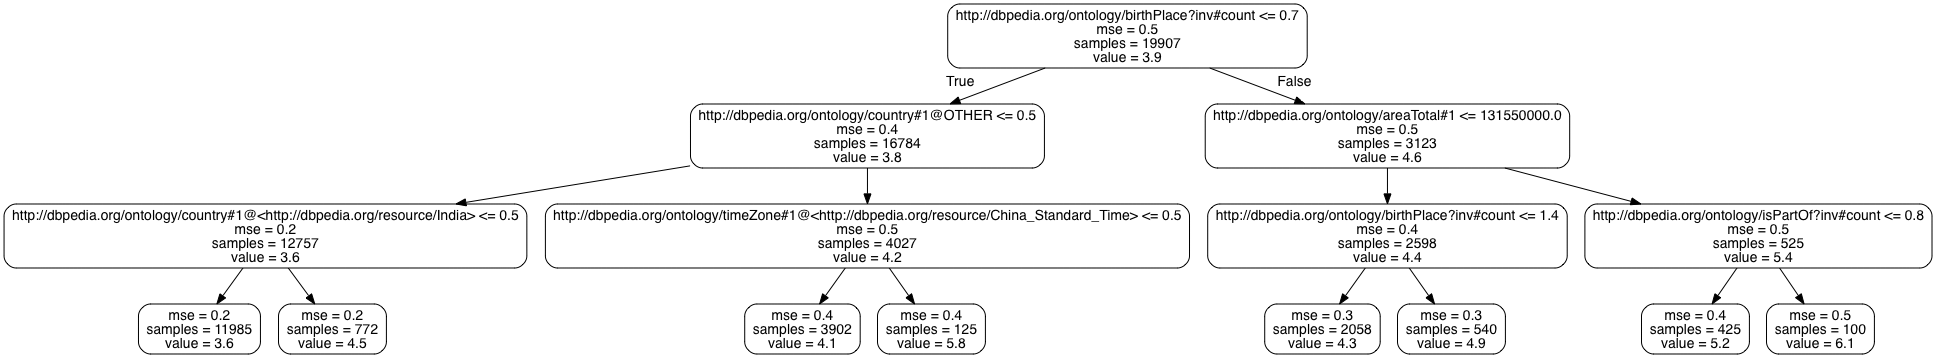

In [267]:
# Visualization
y_val = [x[1] for x in feature_importances]
x_labels = [x[0] for x in feature_importances]
plt.figure(figsize=(15,12))
plt.bar(range(len(y_val)), y_val, orientation='vertical')
# plt.xticks(range(len(y_val)),x_labels, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importaces')
plt.show()
Image(filename='small_tree.png')

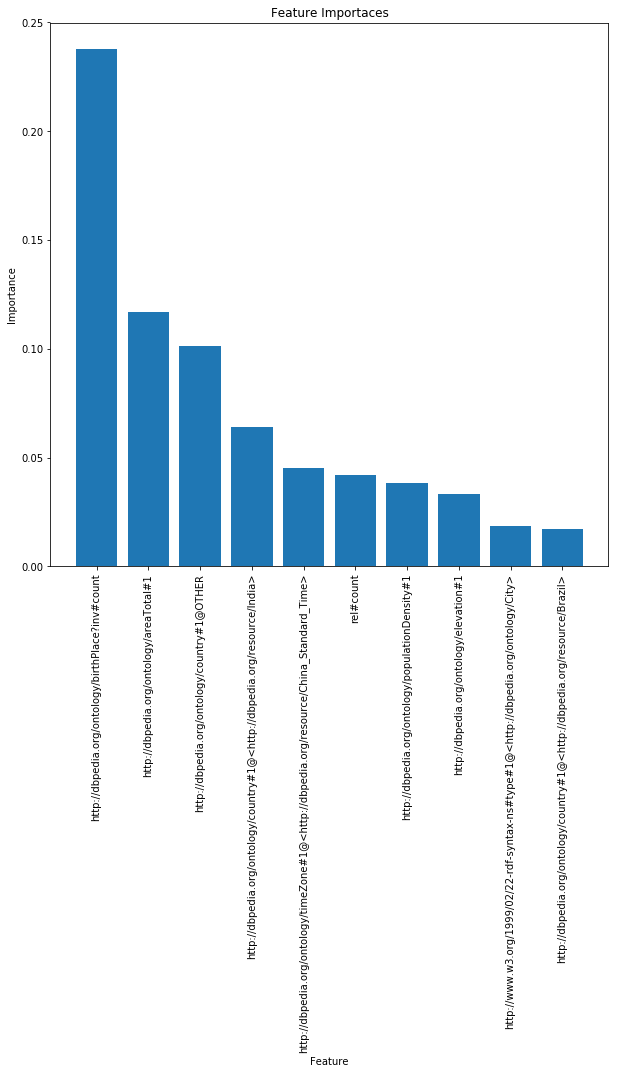

In [268]:
# Plot the top 10 features and their names
plt.figure(figsize=(10,10))
plt.bar(range(10), y_val[0:10], orientation='vertical')
plt.xticks(range(10),x_labels[0:10], rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importaces')
plt.show()

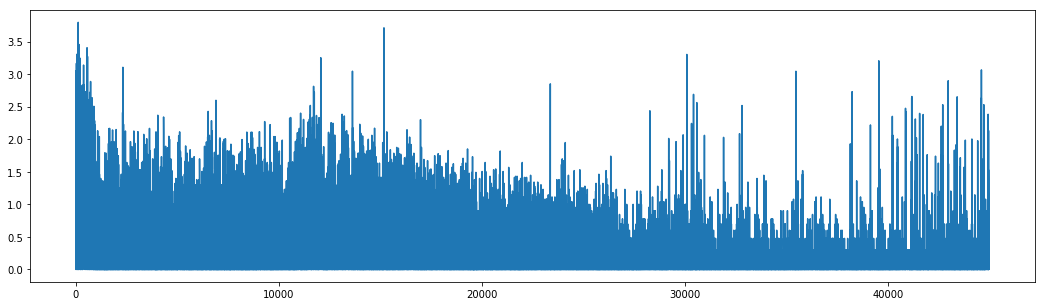

In [269]:
# plot the most important feature and see its distribution
plt.figure(figsize=(18,5))
plt.plot(features[x_labels[0]])

In [270]:
def threshold(x,lower_bound,upper_bound):
    if x>lower_bound and x<upper_bound:
        x=1
    else:
        x=0
    return x

In [271]:
#drill-down with mean+-2sd as threshold and create a new feature column 
df_new = pd.read_csv('ch6_cell28_dev_feat1_filtered.tsv.gz',header=0, sep='\t')
mean = df_new.describe()[x_labels[0]]['mean']
std = df_new.describe()[x_labels[0]]['std']
upper_bound = mean+2*std
lower_bound = mean-2*std
df_new['new_feature'] =df_new[x_labels[0]].apply(threshold, args=(lower_bound, upper_bound, ))

In [272]:
df_new.groupby('new_feature').count()

,name,rel#count,http://dbpedia.org/ontology/area#1,http://dbpedia.org/ontology/areaCode#count,http://dbpedia.org/ontology/areaLand#count,http://dbpedia.org/ontology/areaLand#1,http://dbpedia.org/ontology/areaLand#2,http://dbpedia.org/ontology/areaTotal#count,http://dbpedia.org/ontology/areaTotal#1,http://dbpedia.org/ontology/areaWater#count,...,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_Hamburg>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_people_from_Bolton>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_educational_institutions>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_local_government>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Hainan>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@OTHER,http://xmlns.com/foaf/0.1/homepage#count,http://xmlns.com/foaf/0.1/name#count,http://xmlns.com/foaf/0.1/nick#count,population
new_feature,,,,,,,,,,,,,,,,,,,,,
0,2426,2426,2426,2426,2426,2426,2426,2426,2426,2426,...,2426,2426,2426,2426,2426,2426,2426,2426,2426,2426
1,42533,42533,42533,42533,42533,42533,42533,42533,42533,42533,...,42533,42533,42533,42533,42533,42533,42533,42533,42533,42533


In [273]:
# train with the new feature and calculate the accuracy
df_new = df_new.drop('name', axis=1)
df_new = df_new.drop('population', axis=1)
train_features, test_features, train_labels, test_labels = train_test_split(df_new,labels,test_size=0.3, random_state=42)
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [274]:
#Make prediction on the test set 
predictions = rf.predict(test_features)
errors = abs(predictions- test_labels)
print('Mean Absolute Error:', np.mean(errors))

#Determine Performance Metrics 
#Caculate MAPE(Mean abosolute percentage error)
mape = 100*(errors/test_labels)
#Calculate accuracy
accuracy_new = 100-np.mean(mape)
print("Accuracy:", accuracy,"%")
difference = accuracy_new-accuracy
print("Accuracy Difference:", difference,"%")

Mean Absolute Error: 0.21627198947067117
Accuracy: 94.45536952949631 %
Accuracy Difference: 0.0021141389469363503 %


In [275]:
#drill-down with mean+-2sd as threshold and replace the original feature 
df_new = pd.read_csv('ch6_cell28_dev_feat1_filtered.tsv.gz',header=0, sep='\t')
mean = df_new.describe()[x_labels[0]]['mean']
std = df_new.describe()[x_labels[0]]['std']
upper_bound = mean+2*std
lower_bound = mean-2*std
df_new[x_labels[0]] =df_new[x_labels[0]].apply(threshold, args=(lower_bound, upper_bound, ))

# train with the new replaced feature and calculate the accuracy
df_new = df_new.drop('name', axis=1)
df_new = df_new.drop('population', axis=1)
train_features, test_features, train_labels, test_labels = train_test_split(df_new,labels,test_size=0.3, random_state=42)
rf.fit(train_features, train_labels)
#Make prediction on the test set 
predictions = rf.predict(test_features)
errors = abs(predictions- test_labels)
print('Mean Absolute Error:', np.mean(errors))

#Determine Performance Metrics 
#Caculate MAPE(Mean abosolute percentage error)
mape = 100*(errors/test_labels)
#Calculate accuracy
accuracy_new = 100-np.mean(mape)
print("Accuracy:", accuracy,"%")
difference = accuracy_new-accuracy
print("Accuracy Difference:", difference,"%")

Mean Absolute Error: 0.2162946763600113
Accuracy: 94.45536952949631 %
Accuracy Difference: -0.006683511171345913 %


In [276]:
def threshold(x,threshold):
    if x<threshold:
        x=1
    else:
        x=0
    return x

In [277]:
#drill-down with only mean as threshold and replace the original feature 
df_new = pd.read_csv('ch6_cell28_dev_feat1_filtered.tsv.gz',header=0, sep='\t')
mean = df_new.describe()[x_labels[0]]['mean']
df_new[x_labels[0]] =df_new[x_labels[0]].apply(threshold, args=(mean, ))

# train with the new replaced feature and calculate the accuracy
df_new = df_new.drop('name', axis=1)
df_new = df_new.drop('population', axis=1)
train_features, test_features, train_labels, test_labels = train_test_split(df_new,labels,test_size=0.3, random_state=42)
rf.fit(train_features, train_labels)
#Make prediction on the test set 
predictions = rf.predict(test_features)
errors = abs(predictions- test_labels)
print('Mean Absolute Error:', np.mean(errors))

#Determine Performance Metrics 
#Caculate MAPE(Mean abosolute percentage error)
mape = 100*(errors/test_labels)
#Calculate accuracy
accuracy_new = 100-np.mean(mape)
print("Accuracy:", accuracy,"%")
difference = accuracy_new-accuracy
print("Accuracy Difference:", difference,"%")

Mean Absolute Error: 0.21683293980627644
Accuracy: 94.45536952949631 %
Accuracy Difference: -0.019970480868138907 %


In [278]:
#drill-down with only mean as threshold and generate a new feature 
df_new = pd.read_csv('ch6_cell28_dev_feat1_filtered.tsv.gz',header=0, sep='\t')
mean = df_new.describe()[x_labels[0]]['mean']
df_new['new_feature'] =df_new[x_labels[0]].apply(threshold, args=(mean, ))

# train with the new replaced feature and calculate the accuracy
df_new = df_new.drop('name', axis=1)
df_new = df_new.drop('population', axis=1)
train_features, test_features, train_labels, test_labels = train_test_split(df_new,labels,test_size=0.3, random_state=42)
rf.fit(train_features, train_labels)
#Make prediction on the test set 
predictions = rf.predict(test_features)
errors = abs(predictions- test_labels)
print('Mean Absolute Error:', np.mean(errors))

#Determine Performance Metrics 
#Caculate MAPE(Mean abosolute percentage error)
mape = 100*(errors/test_labels)
#Calculate accuracy
accuracy_new = 100-np.mean(mape)
print("Accuracy:", accuracy,"%")
difference = accuracy_new-accuracy
print("Accuracy Difference:", difference,"%") 

Mean Absolute Error: 0.2163918760965672
Accuracy: 94.45536952949631 %
Accuracy Difference: -0.0004880325009679609 %


In [279]:
df_new.groupby('new_feature').count()

,rel#count,http://dbpedia.org/ontology/area#1,http://dbpedia.org/ontology/areaCode#count,http://dbpedia.org/ontology/areaLand#count,http://dbpedia.org/ontology/areaLand#1,http://dbpedia.org/ontology/areaLand#2,http://dbpedia.org/ontology/areaTotal#count,http://dbpedia.org/ontology/areaTotal#1,http://dbpedia.org/ontology/areaWater#count,http://dbpedia.org/ontology/areaWater#1,...,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Egypt>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_Hamburg>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_people_from_Bolton>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/List_of_educational_institutions>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/History_of_local_government>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@<http://dbpedia.org/resource/Hainan>,http://www.w3.org/2000/01/rdf-schema#seeAlso#3@OTHER,http://xmlns.com/foaf/0.1/homepage#count,http://xmlns.com/foaf/0.1/name#count,http://xmlns.com/foaf/0.1/nick#count
new_feature,,,,,,,,,,,,,,,,,,,,,
0,13786,13786,13786,13786,13786,13786,13786,13786,13786,13786,...,13786,13786,13786,13786,13786,13786,13786,13786,13786,13786
1,31173,31173,31173,31173,31173,31173,31173,31173,31173,31173,...,31173,31173,31173,31173,31173,31173,31173,31173,31173,31173


In [ ]:
prove